<a href="https://colab.research.google.com/github/dhahbimohamed/ml-zero-to-expert/blob/main/08_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**🧠 My Overall Rating: 8.5/10**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = load_breast_cancer()
X = pd.DataFrame(data.data , columns = data.feature_names)
y = data.target

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# **1️⃣ What is Logistic Regression?**
Logistic Regression is a type of linear model used for classification tasks rather than predicting continuous values. While linear regression predicts numerical outcomes (like salary or house prices), logistic regression predicts probabilities of classes, such as whether an email is spam or not, or if a tumor is malignant (0) or benign (1). It uses the sigmoid function to map any real-valued input into a range between 0 and 1, which is then interpreted as a probability.





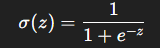




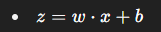

In [ ]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred = model.predict(X_test)

# **3️⃣ What Does the Classification Report Tell Us?**
The classification report summarizes how well a classification model performs. It includes:

* Precision the percentage of predicted positives that were actually correct.

* Recall the percentage of actual positives that were correctly predicted.

* F1-score the harmonic mean of precision and recall; it balances the two.

* Support the number of actual samples in each class.

It helps you understand not just how many predictions were correct or wrong, but how confident and consistent the model is in each class.

In [ ]:
print(classification_report(y_test,y_pred , target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



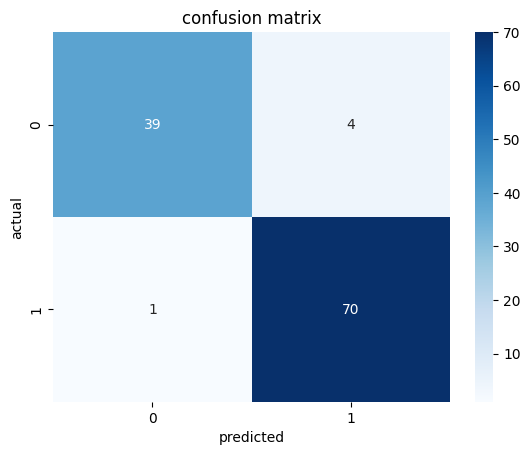

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot =True , fmt="d", cmap="Blues")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

# **2️⃣ How Do the Coefficients Affect the Prediction?**
In logistic regression, each coefficient represents how much a feature influences the model’s prediction.

A positive coefficient increases the probability of predicting class 1 (e.g. benign).

A negative coefficient increases the probability of predicting class 0 (e.g. malignant).
The larger the absolute value of a coefficient, the more impact that feature has on the prediction. Small or near-zero coefficients suggest the feature has little influence.

In [ ]:
coef_df = pd.DataFrame(model.coef_[0] , index=X.columns, columns=["Coefficient"])
coef_df = coef_df.sort_values(by="Coefficient", ascending=False)
print(coef_df.head(10))

                         Coefficient
texture error               1.370567
mean radius                 1.027437
mean texture                0.221451
worst radius                0.111653
compactness error           0.047361
mean area                   0.025467
fractal dimension error     0.011605
worst perimeter            -0.015554
worst area                 -0.016857
smoothness error           -0.022455


# **Mini Challenge**
Print the top 5 features with the highest positive influence on predicting malignant


In [ ]:
malignant_coef_df = coef_df.sort_values(by="Coefficient")
print("Top 5 features with the highest positive influence on predicting malignant:")
print(malignant_coef_df.head(5))

Top 5 features with the highest positive influence on predicting malignant:
                      Coefficient
worst concavity         -1.428595
worst compactness       -0.772709
worst symmetry          -0.746894
mean concavity          -0.532558
worst concave points    -0.510929
